In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
redfin_df = pd.read_csv('../data/Redfin_zipcode.csv', low_memory=False)

In [221]:
redfin_df['PERIOD_BEGIN'] = pd.to_datetime(redfin_df['PERIOD_BEGIN'])

In [222]:
redfin_df.columns = redfin_df.columns.str.strip()
redfin_df['REGION'] = redfin_df['REGION'].astype(str)
redfin_df['zipcode'] = redfin_df['REGION'].str.extract(r'(\d{5})')
redfin_df[['REGION', 'zipcode']].drop_duplicates().head()

,REGION,zipcode
0,Zip Code: 02645,02645
1,Zip Code: 78003,78003
2,Zip Code: 02189,02189
3,Zip Code: 13142,13142
4,Zip Code: 68502,68502


In [223]:
redfin_df = redfin_df.dropna(subset=['PERIOD_BEGIN'])

In [224]:
redfin_df['PERIOD_BEGIN'].min()

Timestamp('2012-01-01 00:00:00')

In [225]:
redfin_df['PERIOD_BEGIN'].max()

Timestamp('2025-01-01 00:00:00')

In [226]:
redfin_df['year'] = redfin_df['PERIOD_BEGIN'].dt.year

In [227]:
nashville_redfin = redfin_df[redfin_df['PARENT_METRO_REGION'] == 'Nashville, TN'].copy()




In [229]:
nashville_redfin[['PERIOD_BEGIN', 'zipcode', 'MEDIAN_SALE_PRICE']].head()

,PERIOD_BEGIN,zipcode,MEDIAN_SALE_PRICE
323,2024-03-01,37204,1495000.0
744,2018-05-01,37073,259900.0
942,2014-09-01,38487,105000.0
1190,2015-07-01,38567,488000.0
1298,2014-03-01,37211,170000.0


In [230]:
nashville_redfin['MEDIAN_SALE_PRICE'] = pd.to_numeric(nashville_redfin['MEDIAN_SALE_PRICE'])
nashville_redfin = nashville_redfin.dropna(subset=['zipcode', 'MEDIAN_SALE_PRICE'])
grouped_prices_nash = nashville_redfin.groupby(['year', 'zipcode'])['MEDIAN_SALE_PRICE'].mean().reset_index()
grouped_prices_nash.rename(columns={'MEDIAN_SALE_PRICE': 'avg_median_sale_price'})
grouped_prices_nash.head()


,year,zipcode,MEDIAN_SALE_PRICE
0,2013,37010,236300.00
1,2013,37011,82250.00
2,2013,37013,113518.75
3,2013,37014,435000.00
4,2013,37015,116506.25


In [232]:
cols_to_keep = [
    'zipcode', 'year', 'MEDIAN_SALE_PRICE', 'MEDIAN_LIST_PRICE', 'MEDIAN_PPSF',
    'AVG_SALE_TO_LIST', 'HOMES_SOLD', 'NEW_LISTINGS', 'INVENTORY',
    'MONTHS_OF_SUPPLY', 'MEDIAN_DOM', 'PRICE_DROPS', 'SOLD_ABOVE_LIST',
    'MEDIAN_SALE_PRICE_MOM', 'MEDIAN_SALE_PRICE_YOY'
]

filtered_redfin = nashville_redfin[cols_to_keep].copy()
filtered_redfin = filtered_redfin.groupby(['year', 'zipcode']).mean().reset_index()

filtered_redfin.to_csv("redfin_filtered.csv", index=False)

In [244]:
crime_df = pd.read_csv("../data/Metro_Nashville_Police_Department_Incidents.csv", low_memory=False)
crime_df["incident_occurred"] = pd.to_datetime(crime_df["Incident_Occurred"])
crime_df["year"] = crime_df["incident_occurred"].dt.year
crime_df["year"] = crime_df["year"].astype(int)


In [312]:
crime_df['year']

1         2019
2         2019
3         2019
6         2019
7         2019
          ... 
885060    2024
885061    2024
885062    2024
885063    2024
885066    2024
Name: year, Length: 462601, dtype: int32

In [246]:
crime_df["zipcode"] = crime_df["ZIP_Code"].astype(str)
crime_df["zipcode"] = crime_df["zipcode"].str.extract(r"^(\d+)")
crime_df = crime_df[crime_df["zipcode"].notna()]
crime_df = crime_df[crime_df["zipcode"].str.match(r"^37[0-2]\d{2}$")]

In [247]:
crime_df['zipcode']

1         37216
2         37214
3         37214
6         37221
7         37203
          ...  
885060    37211
885061    37217
885062    37218
885063    37209
885066    37201
Name: zipcode, Length: 462601, dtype: object

In [248]:
total_incidents = crime_df.groupby(["zipcode", "year"]).size().reset_index(name="total_incidents")

In [251]:
total_incidents

,zipcode,year,total_incidents
0,37013,2018,6164
1,37013,2019,5744
2,37013,2020,5677
3,37013,2021,5861
4,37013,2022,6279
...,...,...,...
320,37240,2022,6
321,37240,2023,8
322,37240,2024,10
323,37240,2025,4


In [254]:
violent_codes = ["09A", "09B", "09C",
                 "100",               
                 "11A", "11B", "11C", "11D",  
                 "120",               
                 "13A", "13B", "13C", "13D"]  

In [256]:
property_codes = ["200", "210", "220",
                  "23A", "23B", "23C", "23D", "23E", "23F", "23G", "23H",
                  "240", 
                  "250", "26A", "26B", "26C", "26D", "26E", "26F", "26G", 
                  "270", "280", "290"]


In [258]:
violent_crime = crime_df[crime_df["Offense_NIBRS"].isin(violent_codes)]
violent_summary = violent_crime.groupby(["zipcode", "year"]).size().reset_index(name="violent_crimes")

In [260]:
violent_summary

,zipcode,year,violent_crimes
0,37013,2018,1262
1,37013,2019,1227
2,37013,2020,1237
3,37013,2021,1392
4,37013,2022,1461
...,...,...,...
262,37240,2018,5
263,37240,2019,9
264,37240,2020,5
265,37240,2021,1


In [262]:
property_crime = crime_df[crime_df["Offense_NIBRS"].isin(property_codes)]
property_summary = property_crime.groupby(["zipcode", "year"]).size().reset_index(name="property_crimes")

In [264]:
property_summary

,zipcode,year,property_crimes
0,37013,2018,596
1,37013,2019,545
2,37013,2020,530
3,37013,2021,469
4,37013,2022,529
...,...,...,...
251,37228,2025,2
252,37232,2021,1
253,37240,2018,5
254,37240,2019,1


In [266]:
summary = total_incidents.copy()
summary = summary.merge(violent_summary, on=["zipcode", "year"], how="left")
summary = summary.merge(property_summary, on=["zipcode", "year"], how="left")
summary[["violent_crimes", "property_crimes"]] = summary[["violent_crimes", "property_crimes"]].fillna(0).astype(int)


In [268]:
summary

,zipcode,year,total_incidents,violent_crimes,property_crimes
0,37013,2018,6164,1262,596
1,37013,2019,5744,1227,545
2,37013,2020,5677,1237,530
3,37013,2021,5861,1392,469
4,37013,2022,6279,1461,529
...,...,...,...,...,...
320,37240,2022,6,0,0
321,37240,2023,8,0,0
322,37240,2024,10,1,0
323,37240,2025,4,0,0


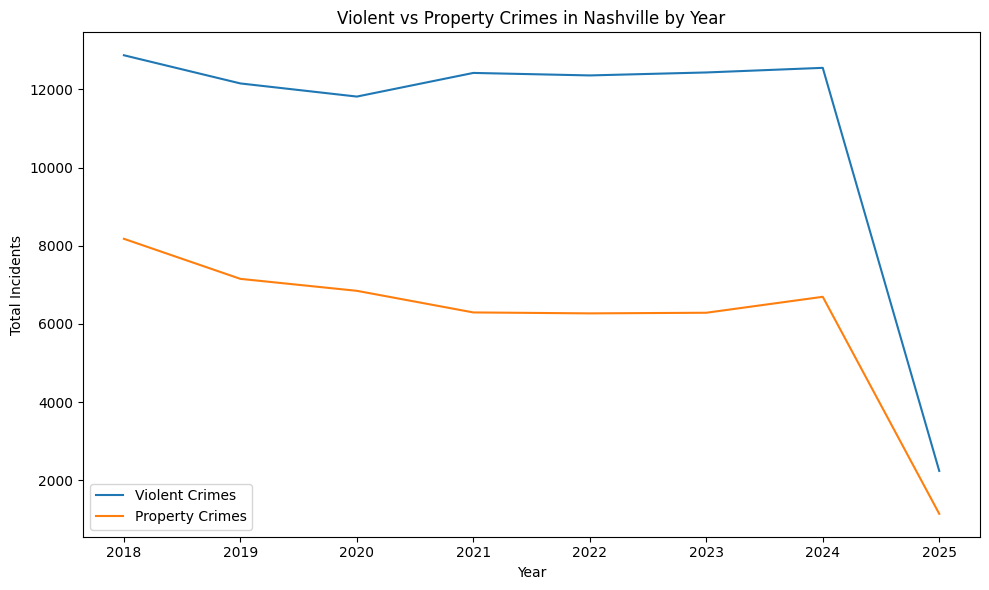

In [270]:
yearly_totals = summary.groupby("year")[["violent_crimes", "property_crimes"]].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals.index, yearly_totals["violent_crimes"], label="Violent Crimes")
plt.plot(yearly_totals.index, yearly_totals["property_crimes"], label="Property Crimes")

plt.title("Violent vs Property Crimes in Nashville by Year")
plt.xlabel("Year")
plt.ylabel("Total Incidents")
plt.legend()
plt.tight_layout()
plt.show()

In [272]:
zip_crime_totals = summary.groupby("zipcode")[["total_incidents", "violent_crimes", "property_crimes"]].sum().reset_index()
top_10_zipcodes = zip_crime_totals.sort_values("total_incidents", ascending=False).head(10)

In [274]:
top_10_zipcodes

,zipcode,total_incidents,violent_crimes,property_crimes
48,37207,46962,9512,5470
0,37013,46558,9937,4053
52,37211,43600,8693,4545
27,37115,37819,7416,4469
44,37203,28259,5197,3027
51,37210,26727,4718,2232
49,37208,25433,5421,2735
58,37217,23621,4949,1816
47,37206,22879,4910,2489
50,37209,22094,3790,2885


In [276]:
safest_zipcodes = summary.groupby("zipcode")[["total_incidents", "violent_crimes", "property_crimes"]].sum().reset_index()


In [278]:
safest_10_zipcodes = safest_zipcodes.sort_values("total_incidents").head(10)

In [280]:
safest_10_zipcodes

,zipcode,total_incidents,violent_crimes,property_crimes
67,37274,1,0,0
36,37172,1,0,0
37,37179,1,0,0
26,37110,1,0,0
38,37185,1,0,0
39,37187,1,0,0
20,37078,1,0,0
43,37202,1,0,0
12,37062,1,0,0
11,37057,1,0,0


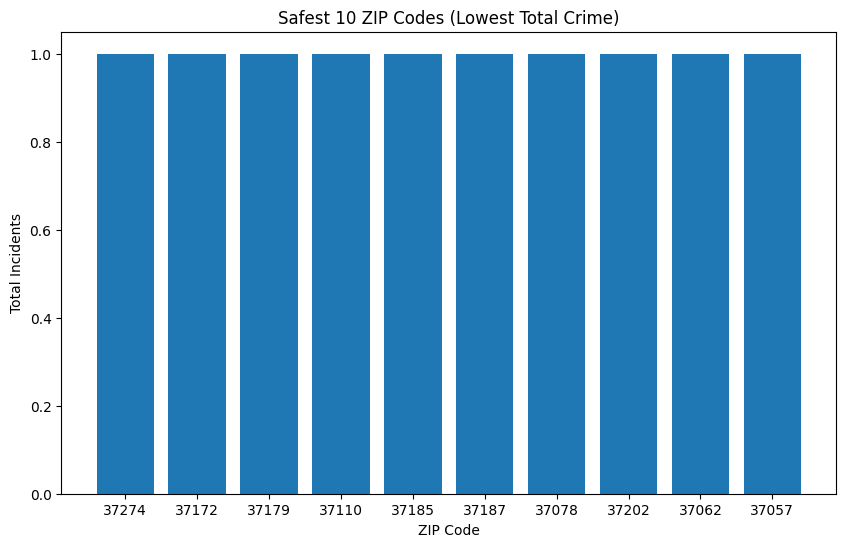

In [282]:
plt.figure(figsize=(10, 6))
plt.bar(safest_10_zipcodes["zipcode"], safest_10_zipcodes["total_incidents"])
plt.title("Safest 10 ZIP Codes (Lowest Total Crime)")
plt.xlabel("ZIP Code")
plt.ylabel("Total Incidents")
plt.show()

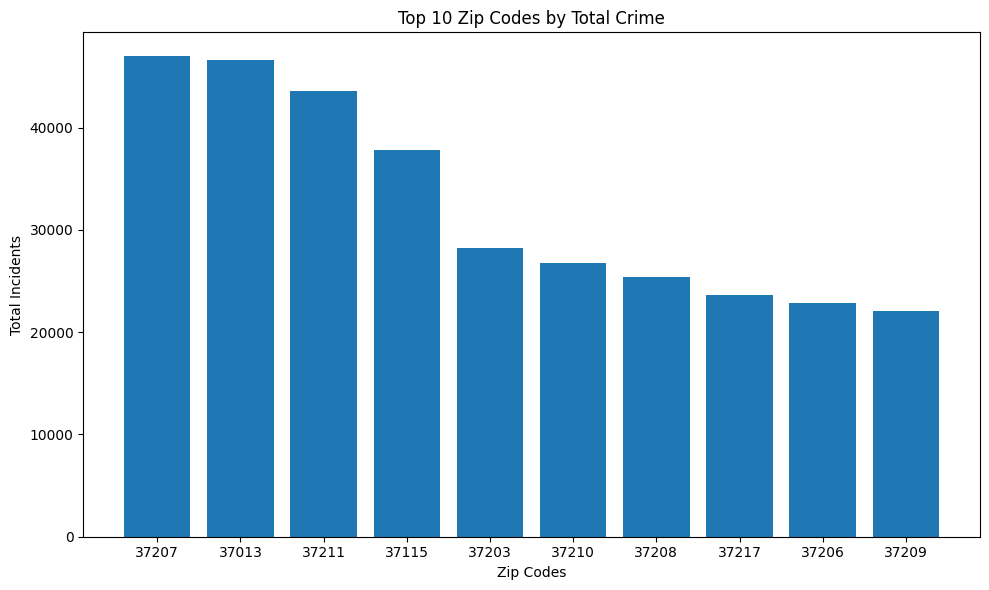

In [284]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_zipcodes["zipcode"], top_10_zipcodes["total_incidents"])
plt.title("Top 10 Zip Codes by Total Crime")
plt.xlabel("Zip Codes")
plt.ylabel("Total Incidents")
plt.tight_layout()
plt.show()

In [286]:
zip_codes = top_10_zipcodes["zipcode"].tolist()
violent_counts = top_10_zipcodes["violent_crimes"].tolist()
property_counts = top_10_zipcodes["property_crimes"].tolist()


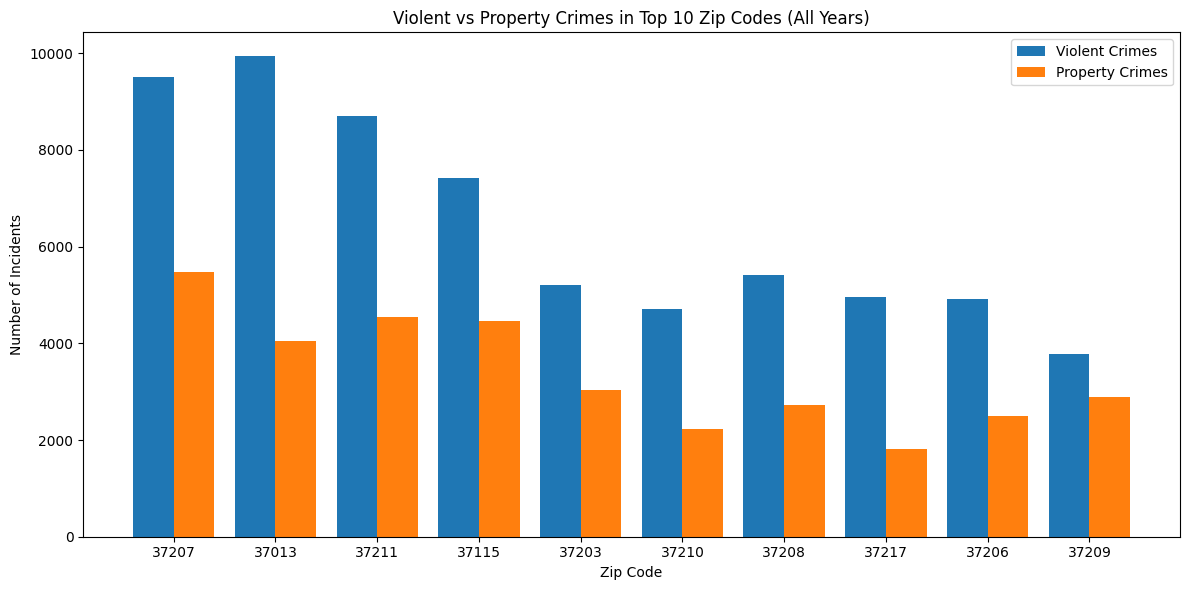

In [288]:
plt.figure(figsize=(12, 6))

bar_width = 0.4
positions = list(range(len(zip_codes)))
property_positions = [p + bar_width for p in positions]

plt.bar(positions, violent_counts, width=bar_width, label="Violent Crimes")
plt.bar(property_positions, property_counts, width=bar_width, label="Property Crimes")
plt.xticks([p + bar_width / 2 for p in positions], zip_codes)
plt.xlabel("Zip Code")
plt.ylabel("Number of Incidents")
plt.title("Violent vs Property Crimes in Top 10 Zip Codes (All Years)")
plt.legend()
plt.tight_layout()
plt.show()

In [290]:
summary.to_csv("../data/crime_summary_by_zip_year.csv", index=False)

In [292]:
pd.read_csv("../data/assessment_2012.csv", nrows=0).columns.tolist()

['year',
 'District Name ',
 'School Name',
 'District ID',
 'School ID',
 'Subject',
 'Grade',
 'Student Group',
 'Number Enrolled',
 'Number of Valid Tests',
 'Number Below Basic',
 'Number Basic',
 'Number Proficient',
 'Number Advanced',
 'Percent Below Basic',
 'Percent Basic',
 'Percent Below Basic or Basic',
 'Percent Proficient',
 'Percent Advanced',
 'Percent Proficient or Advanced']

In [294]:
pd.read_csv("../data/assessment_2023.csv", nrows=0).columns.tolist()

['year',
 'system',
 'system_name',
 'school',
 'school_name',
 'test',
 'subject',
 'grade',
 'student_group',
 'participation_rate',
 'enrolled',
 'tested',
 'valid_tests',
 'n_below',
 'n_approaching',
 'n_met_expectations',
 'n_exceeded_expectations',
 'pct_below',
 'pct_approaching',
 'pct_met_expectations',
 'pct_exceeded_expectations',
 'pct_met_exceeded']

In [296]:
pd.read_csv("../data/assessment_2018.csv", nrows=0).columns.tolist()


['year',
 'system',
 'system_name',
 'school',
 'school_name',
 'test',
 'subject',
 'grade',
 'subgroup',
 'valid_tests',
 'n_below',
 'n_approaching',
 'n_on_track',
 'n_mastered',
 'pct_below',
 'pct_approaching',
 'pct_on_track',
 'pct_mastered',
 'pct_on_mastered']

In [298]:
import os

data_dir = "../data/"
school_files = {
    2012: "assessment_2012.csv",
    2013: "assessment_2013.csv",
    2014: "assessment_2014.csv",
    2015: "assessment_2015.csv",
    2016: "assessment_2016.csv",
    2017: "assessment_2017.csv",
    2018: "assessment_2018.csv",
    2019: "assessment_2019.csv",
    2021: "assessment_2021.csv",
    2022: "assessment_2022.csv",
    2023: "assessment_2023.csv",
    2024: "assessment_2024.csv",
}

standard_columns = {
    "district_name ": "district_name",
    "system_name": "district_name",
    "subgroup": "student_group",
    "name": "school_name",
    "pct_approaching": "pct_basic_or_approaching",
    "percent_basic": "pct_basic_or_approaching",
    "pct_on_track": "pct_proficient_or_on_track",
    "pct_met_expectations": "pct_proficient_or_on_track",
    "percent_proficient": "pct_proficient_or_on_track",
    "pct_mastered": "pct_advanced_or_mastered",
    "pct_exceeded_expectations": "pct_advanced_or_mastered",
    "percent_advanced": "pct_advanced_or_mastered",
    "pct_on_mastered": "pct_combined_score",
    "pct_met_exceeded": "pct_combined_score",
    "percent_proficient_or_advanced": "pct_combined_score",
    "number_of_valid_tests": "valid_tests",
}

final_columns = [
    "year", "district_name", "school_name", "subject", "grade", "student_group",
    "valid_tests", "pct_below", "pct_basic_or_approaching",
    "pct_proficient_or_on_track", "pct_advanced_or_mastered", "pct_combined_score"
]

output_file = "../data/stacked_school_assessments.csv"
first_file = True

for year, filename in school_files.items():
    path = os.path.join(data_dir, filename)

    df = pd.read_csv(path, low_memory=True)

    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
    df = df.rename(columns=standard_columns)

    if "year" not in df.columns:
        df["year"] = year
    else:
        df["year"] = df["year"].fillna(year)

    df = df[[col for col in final_columns if col in df.columns]]
    df = df.reindex(columns=final_columns)

    
    df.to_csv(output_file, mode='w' if first_file else 'a', header=first_file, index=False)
    first_file = False
stacked_school_assessments= pd.read_csv('../data/stacked_school_assessments.csv')

C:\Users\jscho\AppData\Local\Temp\ipykernel_12564\3415982852.py:66: DtypeWarning: Columns (1,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  stacked_school_assessments= pd.read_csv('../data/stacked_school_assessments.csv')


In [299]:
stacked_school_assessments.head()

,year,district_name,school_name,subject,grade,student_group,valid_tests,pct_below,pct_basic_or_approaching,pct_proficient_or_on_track,pct_advanced_or_mastered,pct_combined_score
0,2012,Anderson County,Anderson County High School,Algebra I,10,All,51,NaN,37.3,19.6,2,21.6
1,2012,Anderson County,Anderson County High School,Algebra I,10,Black,1,NaN,*,*,*,*
2,2012,Anderson County,Anderson County High School,Algebra I,10,Economically Disadvantaged (Free or Reduced Pr...,34,NaN,35.3,23.5,2.9,26.5
3,2012,Anderson County,Anderson County High School,Algebra I,10,Students with Disabilities,24,NaN,33.3,20.8,0,20.8
4,2012,Anderson County,Anderson County High School,Algebra I,10,White,50,NaN,38,18,2,20


In [300]:
zip_ref = pd.read_csv("../data/Public_School_Locations_2021-22.csv")
zip_ref.columns = [col.strip().lower().replace(" ", "_") for col in zip_ref.columns]
zip_ref["school_name"] = zip_ref["name"].str.strip().str.upper()
zip_ref["zipcode"] = zip_ref["zip"].astype(str).str.zfill(5)
zip_ref = zip_ref.drop_duplicates(subset="school_name")

C:\Users\jscho\AppData\Local\Temp\ipykernel_12564\1431522455.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  zip_ref = pd.read_csv("../data/Public_School_Locations_2021-22.csv")


In [301]:
zip_ref = zip_ref[zip_ref["state"] == "TN"]
zip_ref = zip_ref[zip_ref["nmcnty"] == "Davidson County"]

In [302]:
zip_ref

,x,y,objectid,ncessch,leaid,name,opstfips,street,city,state,...,csa,nmcsa,necta,nmnecta,cd,sldl,sldu,schoolyear,school_name,zipcode
79984,-86.653802,36.167611,79985,470014502138,4700145,Tenn School For Blind,47,115 Stewarts Ferry PIKE,Nashville,TN,...,400,"Nashville-Davidson--Murfreesboro, TN",N,N,4705,47060,47020,2021-2022,TENN SCHOOL FOR BLIND,37214
79987,-86.653802,36.167611,79988,470014602564,4700146,Tennessee School for the Deaf Nashville,47,115 Stewarts Ferry PIKE,Nashville,TN,...,400,"Nashville-Davidson--Murfreesboro, TN",N,N,4705,47060,47020,2021-2022,TENNESSEE SCHOOL FOR THE DEAF NASHVILLE,37214
79997,-86.781436,36.220505,79998,470014702309,4700147,Brick Church: A LEAD Public School,47,2835 Brick Church PIKE,Nashville,TN,...,400,"Nashville-Davidson--Murfreesboro, TN",N,N,4705,47054,47019,2021-2022,BRICK CHURCH: A LEAD PUBLIC SCHOOL,37207
80010,-86.674236,36.242204,80011,470014702456,4700147,Neely's Bend: A LEAD Public School,47,1251 Neely's Bend RD,Madison,TN,...,400,"Nashville-Davidson--Murfreesboro, TN",N,N,4705,47051,47020,2021-2022,NEELY'S BEND: A LEAD PUBLIC SCHOOL,37115
80277,-86.611817,36.046926,80278,470015502501,4700155,KIPP Antioch College Prep Elementary,47,3655 Murfreesboro PIKE,Antioch,TN,...,400,"Nashville-Davidson--Murfreesboro, TN",N,N,4705,47052,47021,2021-2022,KIPP ANTIOCH COLLEGE PREP ELEMENTARY,37013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81367,-86.640470,36.049775,81368,470318002494,4703180,Eagle View Elementary School,47,1470 Eagleview BLVD,Antioch,TN,...,400,"Nashville-Davidson--Murfreesboro, TN",N,N,4705,47052,47019,2021-2022,EAGLE VIEW ELEMENTARY SCHOOL,37013
81368,-86.753319,36.126224,81369,470318002498,4703180,Casa Azafran Early Learning Center,47,2195 Nolensville PIKE,Nashville,TN,...,400,"Nashville-Davidson--Murfreesboro, TN",N,N,4705,47058,47021,2021-2022,CASA AZAFRAN EARLY LEARNING CENTER,37211
81369,-86.755502,36.166526,81370,470318002521,4703180,Martha O' Bryan Center,47,711 South 7th ST,Nashville,TN,...,400,"Nashville-Davidson--Murfreesboro, TN",N,N,4705,47051,47019,2021-2022,MARTHA O' BRYAN CENTER,37203
81370,-86.641167,36.060365,81371,470318002558,4703180,Cambridge Early Learning Center,47,2325 Hickory Highlands Drive,Antioch,TN,...,400,"Nashville-Davidson--Murfreesboro, TN",N,N,4705,47052,47019,2021-2022,CAMBRIDGE EARLY LEARNING CENTER,37013


In [303]:
zip_ref.to_csv("../data/school_zip_reference_clean.csv", index=False)

In [304]:
redfin_filtered = redfin_filtered.drop_duplicates(subset=["zipcode", "year"])
summary = summary.drop_duplicates(subset=["zipcode", "year"])
redfin_filtered.to_csv("../data/redfin_filtered_clean.csv", index=False)
summary.to_csv("../data/crime_summary_by_zip_year.csv", index=False)

NameError: name 'redfin_filtered' is not defined

In [ ]:
summary

In [ ]:
assess = pd.read_csv("../data/stacked_school_assessments.csv", low_memory=False)
zip_ref = pd.read_csv("../data/school_zip_reference_clean.csv")

assess["school_name"] = assess["school_name"].str.strip().str.upper()
zip_ref["school_name"] = zip_ref["school_name"].str.strip().str.upper()

assess_with_zip = assess.merge(zip_ref, on="school_name", how="left")
assess_with_zip.to_csv("../data/stacked_school_assessments_with_zip.csv", index=False)


In [ ]:
stacked_school_assessments= stacked_school_assessments.drop_duplicates(subset=["year"])

In [ ]:
stacked_school_assessments.to_csv("../data/stacked_school_assessments.csv", index=False)

In [ ]:
def normalize_name(name):
    return name.upper().replace(" SCHOOL", "").replace(" HS", " HIGH").replace(" MS", " MIDDLE").replace(" ES", " ELEMENTARY").strip()

assess_davidson["school_name_norm"] = assess_davidson["school_name"].apply(normalize_name)
zip_ref["school_name_norm"] = zip_ref["school_name"].apply(normalize_name)

merged = assess_davidson.merge(
    zip_ref[["school_name_norm", "zip"]],
    on="school_name_norm",
    how="left"
)
merged.to_csv("../data/stacked_school_assessments_davidson_with_zip.csv", index=False)



In [ ]:
def create_zip_year_key(df):
    df = df.copy()
    df["zipcode"] = df["zipcode"].astype(str).str.strip().str.split(".").str[0].str.zfill(5)
    df["year"] = pd.to_numeric(df["year"]).fillna(0).astype(int)
    df = df[df["zipcode"].str.match(r"^\d{5}$")]
    df["zip_year_key"] = df["zipcode"] + "-" + df["year"].astype(str)
    return df
    
assess = create_zip_year_key(pd.read_csv("../data/stacked_school_assessments_davidson_with_zip.csv", low_memory=False))
redfin = create_zip_year_key(pd.read_csv("../data/redfin_filtered.csv"))
crime = create_zip_year_key(pd.read_csv("../data/crime_summary_by_zip_year.csv"))

lookup_keys = pd.DataFrame({
    "zip_year_key": pd.concat([
        assess["zip_year_key"],
        redfin["zip_year_key"],
        crime["zip_year_key"]
    ]).dropna().unique()
})

lookup_keys.to_csv("../data/zipcode_year_lookup_key.csv", index=False)
assess.to_csv("../data/stacked_school_assessments_with_key.csv", index=False)
redfin.to_csv("../data/redfin_filtered_with_key.csv", index=False)
crime.to_csv("../data/crime_summary_with_key.csv", index=False)


In [ ]:
lookup = pd.read_csv("../data/zipcode_year_lookup_key.csv")
lookup[["zipcode", "year"]] = lookup["zip_year_key"].str.split("-", expand=True)
lookup["zipcode"] = lookup["zipcode"].astype(str).str.zfill(5)
lookup["year"] = lookup["year"].astype(int)
lookup.to_csv("../data/zipcode_year_lookup_key.csv", index=False)

In [ ]:
lookup